In [65]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/refs/heads/main/NBA.csv"
df = pd.read_csv(url)

In [67]:
df = df.dropna()

In [68]:
df['Height'] = df['Height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]) if isinstance(x, str) and '-' in x else x)



In [69]:
X = df[['Age', 'Height', 'Weight']]
y = df['Salary']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)

In [73]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.039039885589410184
Mean Squared Error: 19151258179484.5


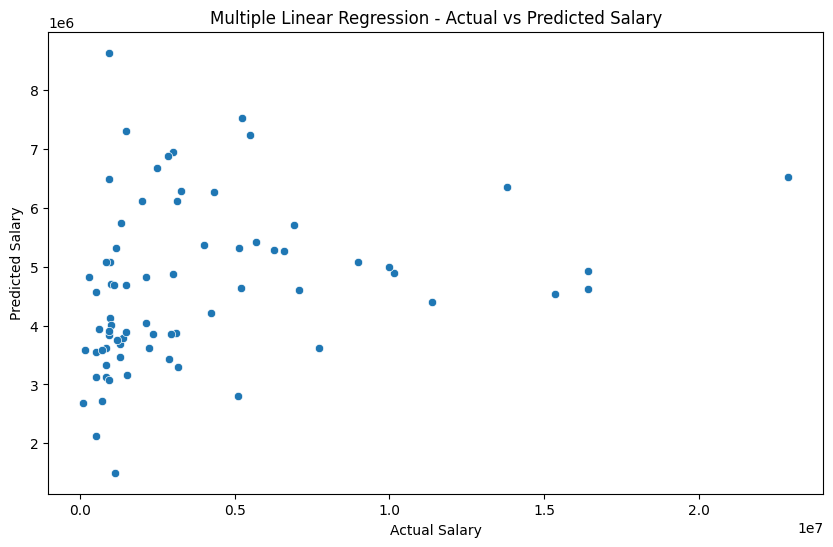

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Multiple Linear Regression - Actual vs Predicted Salary")
plt.show()

In [77]:
# Simulate manual input in Colab
age = 25
feet = 6
inches = 5
weight = 210

height = feet * 12 + inches
input_df = pd.DataFrame([[age, height, weight]], columns=['Age', 'Height', 'Weight'])

salary_pred = model.predict(input_df)[0]
print(f"💰 Predicted NBA Salary: ${salary_pred:,.2f}")


💰 Predicted NBA Salary: $4,500,057.58
